In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras import models
from keras import layers
import numpy as np

normalized_data = pd.read_csv("normalized_data_with_predicted_age.csv", index_col=0)
normalized_data 

Using TensorFlow backend.


,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,...,SOTON/O.Q.,2.,W./C.,STON/O,CA.,A/5,SC/PARIS,2343,CA,A/5.
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.271174,0.2,0.000000,0.014151,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.472229,0.2,0.000000,0.139136,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.321438,0.0,0.000000,0.015469,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.434531,0.2,0.000000,0.103644,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.434531,0.0,0.000000,0.015713,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,NaN,1.0,0.260001,0.0,0.000000,0.015070,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1302,NaN,1.0,0.259994,0.0,0.000000,0.015127,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1305,NaN,1.0,0.360627,0.0,0.000000,0.015713,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Split data into train and test

In [2]:
normalized_train_data = normalized_data[normalized_data.Survived.notna()]
normalized_test_data = normalized_data[normalized_data.Survived.isna()]
normalized_train_data

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,...,SOTON/O.Q.,2.,W./C.,STON/O,CA.,A/5,SC/PARIS,2343,CA,A/5.
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.271174,0.2,0.000000,0.014151,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.472229,0.2,0.000000,0.139136,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.321438,0.0,0.000000,0.015469,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.434531,0.2,0.000000,0.103644,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.434531,0.0,0.000000,0.015713,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,0.0,1.0,0.331168,0.0,0.000000,0.014110,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
864,0.0,1.0,0.267828,1.6,0.333333,0.135753,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
869,0.0,1.0,0.360791,0.0,0.000000,0.018543,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Creating model

In [3]:
x_train = normalized_train_data.drop(["Survived"], axis=1).values
y_train = normalized_train_data["Survived"].values

number_of_epochs = 100
number_of_folds = 5
number_of_samples = len(x_train) // number_of_folds

all_histories = []
for i in range(number_of_folds):
    print("processing fold #", i)
    
    partial_x_train = np.concatenate([x_train[:i*number_of_samples],
                                          x_train[(i+1)*number_of_samples:]])
    parital_y_train = np.concatenate([y_train[:i*number_of_samples],
                                          y_train[(i+1)*number_of_samples:]])
    
    partial_x_validation = x_train[i*number_of_samples:(i+1)*number_of_samples]
    partial_y_validation = y_train[i*number_of_samples:(i+1)*number_of_samples]
    
    model = models.Sequential()
    model.add(layers.Dense(x_train.shape[1], activation="relu", input_shape=(x_train.shape[1],)))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(32, activation="relu"))
    model.add(layers.Dense(1, activation="sigmoid"))

    model.compile(optimizer="rmsprop",
                  loss="binary_crossentropy",
                  metrics=["acc"])

    history = model.fit(partial_x_train,
                        parital_y_train,
                        epochs=number_of_epochs,
                        batch_size=16,
                        validation_data=[partial_x_validation,partial_y_validation])
    all_histories.append(history.history)

# model = models.Sequential()
# model.add(layers.Dense(x_train.shape[1], activation="relu", input_shape=(x_train.shape[1],)))
# model.add(layers.Dense(64, activation="relu"))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(32, activation="relu"))
# model.add(layers.Dense(1, activation="sigmoid"))

# model.compile(optimizer="rmsprop",
#               loss="binary_crossentropy",
#               metrics=["acc"])

# history = model.fit(x_train,
#                     y_train,
#                     epochs=number_of_epochs,
#                     batch_size=16,
#                     validation_data=[])

processing fold # 0
Train on 713 samples, validate on 178 samples
Epoch 1/100
713/713 [==============================] - 0s 396us/step - loss: 0.5786 - acc: 0.6971 - val_loss: 0.5051 - val_acc: 0.7865
Epoch 2/100
713/713 [==============================] - 0s 156us/step - loss: 0.5133 - acc: 0.7854 - val_loss: 0.4898 - val_acc: 0.7865
Epoch 3/100
713/713 [==============================] - 0s 132us/step - loss: 0.4983 - acc: 0.7896 - val_loss: 0.4810 - val_acc: 0.7809
Epoch 4/100
713/713 [==============================] - 0s 139us/step - loss: 0.4676 - acc: 0.8022 - val_loss: 0.4855 - val_acc: 0.7865
Epoch 5/100
713/713 [==============================] - 0s 137us/step - loss: 0.4628 - acc: 0.7924 - val_loss: 0.4912 - val_acc: 0.7978
Epoch 6/100
713/713 [==============================] - 0s 140us/step - loss: 0.4492 - acc: 0.8008 - val_loss: 0.4688 - val_acc: 0.7978
Epoch 7/100
713/713 [==============================] - 0s 138us/step - loss: 0.4448 - acc: 0.8065 - val_loss: 0.4704 - val_a

Epoch 61/100
713/713 [==============================] - 0s 130us/step - loss: 0.3538 - acc: 0.8541 - val_loss: 0.5244 - val_acc: 0.8146
Epoch 62/100
713/713 [==============================] - 0s 122us/step - loss: 0.3491 - acc: 0.8597 - val_loss: 0.5353 - val_acc: 0.7978
Epoch 63/100
713/713 [==============================] - 0s 134us/step - loss: 0.3378 - acc: 0.8682 - val_loss: 0.5403 - val_acc: 0.8034
Epoch 64/100
713/713 [==============================] - 0s 128us/step - loss: 0.3509 - acc: 0.8682 - val_loss: 0.5380 - val_acc: 0.7865
Epoch 65/100
713/713 [==============================] - 0s 135us/step - loss: 0.3416 - acc: 0.8626 - val_loss: 0.5371 - val_acc: 0.8034
Epoch 66/100
713/713 [==============================] - 0s 137us/step - loss: 0.3437 - acc: 0.8654 - val_loss: 0.5352 - val_acc: 0.7865
Epoch 67/100
713/713 [==============================] - 0s 138us/step - loss: 0.3532 - acc: 0.8640 - val_loss: 0.5377 - val_acc: 0.8034
Epoch 68/100
713/713 [==========================

Epoch 21/100
713/713 [==============================] - 0s 132us/step - loss: 0.3715 - acc: 0.8415 - val_loss: 0.4471 - val_acc: 0.8539
Epoch 22/100
713/713 [==============================] - 0s 132us/step - loss: 0.3907 - acc: 0.8513 - val_loss: 0.4489 - val_acc: 0.8371
Epoch 23/100
713/713 [==============================] - 0s 131us/step - loss: 0.3806 - acc: 0.8429 - val_loss: 0.4499 - val_acc: 0.8371
Epoch 24/100
713/713 [==============================] - 0s 132us/step - loss: 0.3812 - acc: 0.8527 - val_loss: 0.4541 - val_acc: 0.8202
Epoch 25/100
713/713 [==============================] - 0s 139us/step - loss: 0.3917 - acc: 0.8457 - val_loss: 0.4578 - val_acc: 0.8202
Epoch 26/100
713/713 [==============================] - 0s 140us/step - loss: 0.3788 - acc: 0.8471 - val_loss: 0.4606 - val_acc: 0.8202
Epoch 27/100
713/713 [==============================] - 0s 139us/step - loss: 0.3793 - acc: 0.8513 - val_loss: 0.4605 - val_acc: 0.8315
Epoch 28/100
713/713 [==========================

713/713 [==============================] - 0s 123us/step - loss: 0.3523 - acc: 0.8569 - val_loss: 0.5547 - val_acc: 0.8483
Epoch 82/100
713/713 [==============================] - 0s 142us/step - loss: 0.3394 - acc: 0.8640 - val_loss: 0.5930 - val_acc: 0.8427
Epoch 83/100
713/713 [==============================] - 0s 125us/step - loss: 0.3471 - acc: 0.8640 - val_loss: 0.5730 - val_acc: 0.8539
Epoch 84/100
713/713 [==============================] - 0s 131us/step - loss: 0.3407 - acc: 0.8640 - val_loss: 0.5774 - val_acc: 0.8483
Epoch 85/100
713/713 [==============================] - 0s 134us/step - loss: 0.3479 - acc: 0.8612 - val_loss: 0.5782 - val_acc: 0.8483
Epoch 86/100
713/713 [==============================] - 0s 144us/step - loss: 0.3423 - acc: 0.8626 - val_loss: 0.5952 - val_acc: 0.8483
Epoch 87/100
713/713 [==============================] - 0s 137us/step - loss: 0.3374 - acc: 0.8555 - val_loss: 0.5932 - val_acc: 0.8371
Epoch 88/100
713/713 [==============================] - 0s 14

Epoch 41/100
713/713 [==============================] - 0s 126us/step - loss: 0.3718 - acc: 0.8583 - val_loss: 0.6038 - val_acc: 0.7640
Epoch 42/100
713/713 [==============================] - 0s 135us/step - loss: 0.3612 - acc: 0.8555 - val_loss: 0.5792 - val_acc: 0.7528
Epoch 43/100
713/713 [==============================] - 0s 126us/step - loss: 0.3566 - acc: 0.8626 - val_loss: 0.5898 - val_acc: 0.7528
Epoch 44/100
713/713 [==============================] - 0s 145us/step - loss: 0.3612 - acc: 0.8597 - val_loss: 0.5868 - val_acc: 0.7697
Epoch 45/100
713/713 [==============================] - 0s 129us/step - loss: 0.3595 - acc: 0.8597 - val_loss: 0.6022 - val_acc: 0.7584
Epoch 46/100
713/713 [==============================] - 0s 138us/step - loss: 0.3551 - acc: 0.8583 - val_loss: 0.6031 - val_acc: 0.7528
Epoch 47/100
713/713 [==============================] - 0s 133us/step - loss: 0.3561 - acc: 0.8597 - val_loss: 0.6019 - val_acc: 0.7528
Epoch 48/100
713/713 [==========================

713/713 [==============================] - 0s 394us/step - loss: 0.5945 - acc: 0.6844 - val_loss: 0.4892 - val_acc: 0.8146
Epoch 2/100
713/713 [==============================] - 0s 133us/step - loss: 0.5186 - acc: 0.7812 - val_loss: 0.4529 - val_acc: 0.7978
Epoch 3/100
713/713 [==============================] - 0s 127us/step - loss: 0.4856 - acc: 0.7966 - val_loss: 0.4354 - val_acc: 0.8034
Epoch 4/100
713/713 [==============================] - 0s 129us/step - loss: 0.4820 - acc: 0.7924 - val_loss: 0.4273 - val_acc: 0.8034
Epoch 5/100
713/713 [==============================] - 0s 136us/step - loss: 0.4589 - acc: 0.8065 - val_loss: 0.4248 - val_acc: 0.8034
Epoch 6/100
713/713 [==============================] - 0s 133us/step - loss: 0.4487 - acc: 0.8050 - val_loss: 0.4190 - val_acc: 0.8090
Epoch 7/100
713/713 [==============================] - 0s 130us/step - loss: 0.4632 - acc: 0.8107 - val_loss: 0.4131 - val_acc: 0.8034
Epoch 8/100
713/713 [==============================] - 0s 146us/ste

713/713 [==============================] - 0s 132us/step - loss: 0.3834 - acc: 0.8457 - val_loss: 0.4207 - val_acc: 0.8427
Epoch 62/100
713/713 [==============================] - 0s 136us/step - loss: 0.3833 - acc: 0.8541 - val_loss: 0.4162 - val_acc: 0.8258
Epoch 63/100
713/713 [==============================] - 0s 136us/step - loss: 0.3774 - acc: 0.8541 - val_loss: 0.4194 - val_acc: 0.8483
Epoch 64/100
713/713 [==============================] - 0s 139us/step - loss: 0.3891 - acc: 0.8401 - val_loss: 0.4188 - val_acc: 0.8315
Epoch 65/100
713/713 [==============================] - 0s 141us/step - loss: 0.3839 - acc: 0.8555 - val_loss: 0.4261 - val_acc: 0.8258
Epoch 66/100
713/713 [==============================] - 0s 133us/step - loss: 0.3922 - acc: 0.8499 - val_loss: 0.4330 - val_acc: 0.8371
Epoch 67/100
713/713 [==============================] - 0s 139us/step - loss: 0.3879 - acc: 0.8583 - val_loss: 0.4479 - val_acc: 0.8258
Epoch 68/100
713/713 [==============================] - 0s 12

Epoch 21/100
713/713 [==============================] - 0s 129us/step - loss: 0.4044 - acc: 0.8345 - val_loss: 0.3997 - val_acc: 0.8315
Epoch 22/100
713/713 [==============================] - 0s 138us/step - loss: 0.3960 - acc: 0.8443 - val_loss: 0.4007 - val_acc: 0.8315
Epoch 23/100
713/713 [==============================] - 0s 133us/step - loss: 0.3894 - acc: 0.8457 - val_loss: 0.4096 - val_acc: 0.8146
Epoch 24/100
713/713 [==============================] - 0s 135us/step - loss: 0.3934 - acc: 0.8359 - val_loss: 0.3961 - val_acc: 0.8483
Epoch 25/100
713/713 [==============================] - 0s 144us/step - loss: 0.3942 - acc: 0.8499 - val_loss: 0.4079 - val_acc: 0.8258
Epoch 26/100
713/713 [==============================] - 0s 127us/step - loss: 0.3928 - acc: 0.8443 - val_loss: 0.4004 - val_acc: 0.8315
Epoch 27/100
713/713 [==============================] - 0s 138us/step - loss: 0.3869 - acc: 0.8387 - val_loss: 0.3946 - val_acc: 0.8371
Epoch 28/100
713/713 [==========================

713/713 [==============================] - 0s 122us/step - loss: 0.3553 - acc: 0.8569 - val_loss: 0.4417 - val_acc: 0.8315
Epoch 82/100
713/713 [==============================] - 0s 148us/step - loss: 0.3590 - acc: 0.8541 - val_loss: 0.4389 - val_acc: 0.8371
Epoch 83/100
713/713 [==============================] - 0s 129us/step - loss: 0.3526 - acc: 0.8583 - val_loss: 0.4333 - val_acc: 0.8427
Epoch 84/100
713/713 [==============================] - 0s 129us/step - loss: 0.3500 - acc: 0.8612 - val_loss: 0.4488 - val_acc: 0.8427
Epoch 85/100
713/713 [==============================] - 0s 144us/step - loss: 0.3528 - acc: 0.8668 - val_loss: 0.4545 - val_acc: 0.8371
Epoch 86/100
713/713 [==============================] - 0s 113us/step - loss: 0.3508 - acc: 0.8626 - val_loss: 0.4635 - val_acc: 0.7584
Epoch 87/100
713/713 [==============================] - 0s 143us/step - loss: 0.3527 - acc: 0.8583 - val_loss: 0.4298 - val_acc: 0.8483
Epoch 88/100
713/713 [==============================] - 0s 13

## Drawing plots

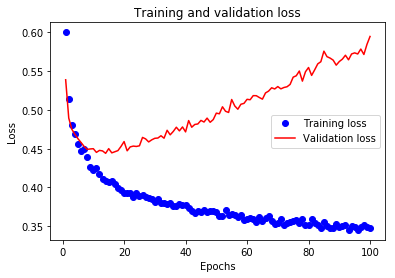

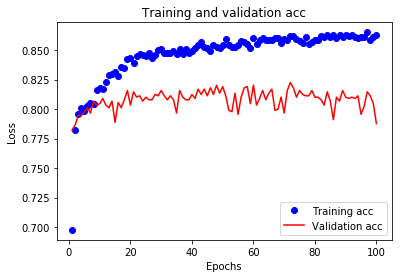

In [4]:
history_dict = history.history

loss_values = [np.mean([x["loss"][i] for x in all_histories]) for i in range(number_of_epochs)]
val_loss_values = [np.mean([x["val_loss"][i] for x in all_histories]) for i in range(number_of_epochs)]

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss", color="red")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


acc_values = [np.mean([x["acc"][i] for x in all_histories]) for i in range(number_of_epochs)]
val_acc_values = [np.mean([x["val_acc"][i] for x in all_histories]) for i in range(number_of_epochs)]

plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="Validation acc", color="red")
plt.title("Training and validation acc")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

## Evaluate results

In [5]:
results = model.predict(normalized_test_data.drop(["Survived"], axis=1))
results = pd.DataFrame(results, columns=["Survived"], index=normalized_test_data.index)

results.loc[results.Survived < 0.5, ["Survived"]] = 0
results.loc[results.Survived >= 0.5, ["Survived"]] = 1
results = results.fillna(0)
results.Survived = results.Survived.astype(int)
results

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1300,0
1302,0
1305,0


## Save results

In [6]:
results.to_csv("Output/my_prediction.csv", index=True)

## Compare with genderr submission

In [7]:
# compare = pd.read_csv("Dataset/gender_submission.csv", index_col=0)
compare = pd.read_csv("Output/799_64_05_32.csv", index_col=0)
compare = compare.rename(columns={"Survived": "Example"})
compare = pd.concat([compare, results], axis=1)
compare = compare.rename(columns={"Survived": "MyPrediction"})
compare[compare.Example != compare.MyPrediction]

,Example,MyPrediction
PassengerId,,
896,1,0
898,1,0
910,1,0
911,1,0
955,1,0
962,1,0
971,1,0
978,1,0
982,1,0
